In [1]:
%matplotlib inline

from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Javascript, display, HTML, Markdown as md
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Start by selecting a company

In [2]:
watchlist = [x[x.find("\\")+1:] for x in  glob("../data/*")]

# Default
stock = watchlist[0]

dropdown = widgets.Dropdown(options = watchlist)


def dropdown_eventhandler(change):
    global stock 
    stock = change.new
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.ncells())'))
    
dropdown.observe(dropdown_eventhandler, names='value')

display(dropdown)

Dropdown(options=('ComfortDelGro Corporation Limited (C52.SI)', 'DBS Group Holdings Ltd (D05.SI)', 'SATS Ltd. …

In [3]:
md("## Balance Sheet of {}".format(stock))

## Balance Sheet of ComfortDelGro Corporation Limited (C52.SI)

In [4]:
# Read data from Morningstar and set metrics as index
income = pd.read_excel("../data/" + stock + "/Income Statement_Annual_As Originally Reported.xls",  index_col=0)
balance = pd.read_excel("../data/" + stock + "/Balance Sheet_Annual_As Originally Reported.xls",  index_col=0)
balance

,2019,2018,2017,2015,2014
Name,,,,,
Total Assets,"5,379,000,000","5,136,700,000","4,827,700,000","5,216,300,000","5,230,700,000"
Total Current Assets,"1,319,100,000","1,277,200,000","1,166,000,000","1,279,700,000","1,239,300,000"
"Cash, Cash Equivalents and Short Term Investments","594,200,000","586,100,000","606,600,000","787,800,000","825,800,000"
Cash and Cash Equivalents,"594,200,000","586,100,000","596,200,000","787,800,000","825,800,000"
Cash,NaN,"14,500,000","15,500,000","16,400,000","11,400,000"
...,...,...,...,...,...
Non-Controlling/Minority Interests,"414,000,000","413,500,000","419,600,000","677,500,000","648,900,000"
Common Shares Issued,"2,166,158,663","2,165,402,663","2,163,600,000","2,150,300,000","2,139,400,000"
Common Shares Outstanding,"2,166,158,663","2,165,402,663","2,163,600,000","2,150,300,000","2,139,400,000"


## Cleaning of data

In [5]:
# Remove whitespaces
balance.index = balance.index.str.strip()
# Transpose df to make metrics as columns
balance = balance.T
# Remove commas and convert str to float for all cols
balance[balance.keys()] = balance[balance.keys()].replace({',': ''}, regex=True).astype(float)/1000000
# Reorder the rows to be ascending downwards
balance = balance.sort_index()
balance


Name,Total Assets,Total Current Assets,"Cash, Cash Equivalents and Short Term Investments",Cash and Cash Equivalents,Cash,Cash Equivalents,Short Term Investments,"Available-for-Sale Securities, Current",Inventories,"Raw Materials, Consumables and Supplies",...,"Common Stock, without Par Value",Retained Earnings/Accumulated Deficit,Reserves/Accumulated Comprehensive Income/Losses,Other Reserves/Accum. Comp. Inc,Cumulative Foreign Exchange Translation Reserves/Accum. Comp. Inc,Non-Controlling/Minority Interests,Common Shares Issued,Common Shares Outstanding,Common Shares Treasury,Fiscal year ends in Dec 31 | SGD
2014,5230.700,1239.300,825.800,825.800,11.400,814.400,0.000,0.000,72.300,52.800,...,0.000,1671.300,-127.800,-77.400,-50.400,648.900,2139.400,2139.400,0.000,nan
2015,5216.300,1279.700,787.800,787.800,16.400,771.400,nan,nan,75.100,57.800,...,0.000,1787.500,-117.900,-64.200,-53.700,677.500,2150.300,2150.300,0.000,nan
2017,4827.700,1166.000,606.600,596.200,15.500,580.700,10.400,nan,113.600,102.500,...,0.000,1974.400,-44.400,126.400,-170.800,419.600,2163.600,2163.600,0.000,nan
2018,5136.700,1277.200,586.100,586.100,14.500,571.600,0.000,nan,138.700,127.400,...,0.000,1923.100,-0.600,80.900,-81.500,413.500,2165.403,2165.403,0.000,nan
2019,5379.000,1319.100,594.200,594.200,nan,nan,nan,nan,150.700,nan,...,nan,1931.900,-29.100,64.500,-93.600,414.000,2166.159,2166.159,0.000,nan


## Balance Sheet Basics

Assets = Liabilities + Shareholder Equity

## Assets


Within the **Assets** category, it is split into current assets and non-current assets.

**Current assets** are short-term assets that can be converted to cash within 12 months: 

1) Cash & Cash Equivalents/Marketable securities

 - Low-risk investments such as short-term government bonds or fixed deposits

2) Account Receivables 

 - Sales that you have made but have not collected cash yet. (Paid in credit)

3) Inventories

 - Raw materials that are purchased but have not been sold to the customers yet
 - Connected to the *Cost of Goods Sold* in the income statement.
 - Too little: Can't meet demand, Too much: Incurred opportunity cost
 - Increasing inventory in the balance sheet might means the goods are stuck in the warehouse and no sales are being made
 

Note: *Revenue* in Income Statement is sum of Cash & Cash Equivalents and Account Receivables



**Non-current** assets are long-term assets that can’t be converted to cash within 12 months:

1) Property, Plant & Equipment (PPE)
 
 - Assets that last for 10 or 20 years such as ands, factories, plants, and machineries
 - Linked to the Income Statement by *Depreciation Expense*





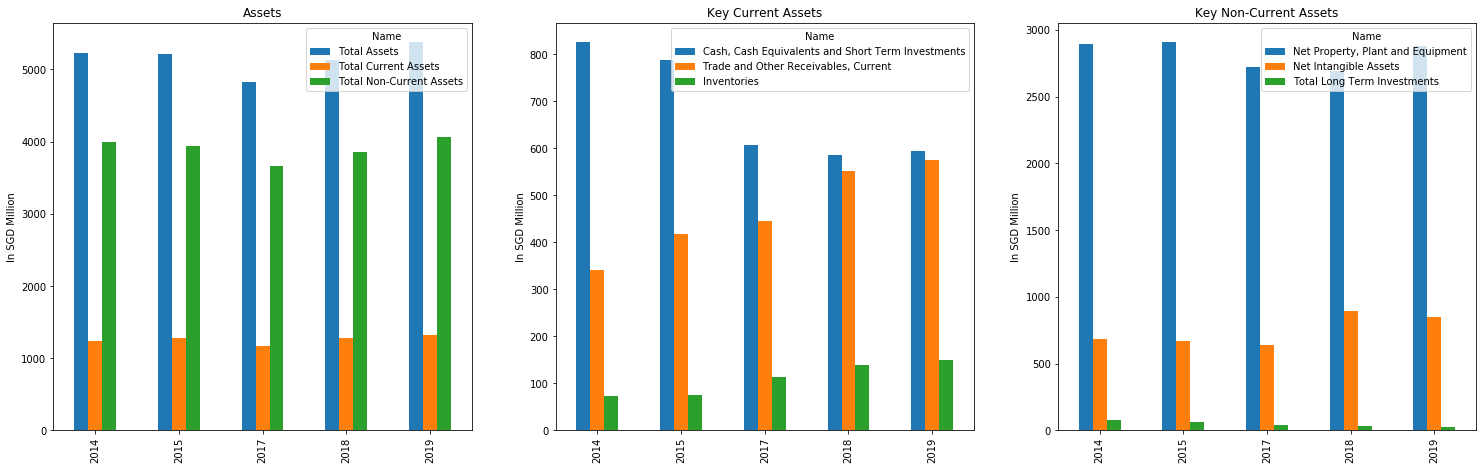

In [6]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(25.5, 7.5)

balance[['Total Assets', 'Total Current Assets', 'Total Non-Current Assets']].plot.bar(ax=axs[0])
axs[0].set_title('Assets');
axs[0].set_ylabel("In SGD Million");

balance[['Cash, Cash Equivalents and Short Term Investments', 'Trade and Other Receivables, Current', 'Inventories']].plot.bar(ax=axs[1])
axs[1].set_title('Key Current Assets');
axs[1].set_ylabel("In SGD Million");

nppe = (balance['Net Property, Plant and Equipment']/balance['Total Non-Current Assets'])*100
nia = (balance['Net Intangible Assets']/balance['Total Non-Current Assets'])*100
tlti = (balance['Total Long Term Investments']/balance['Total Non-Current Assets'])*100

balance[['Net Property, Plant and Equipment', 'Net Intangible Assets', 'Total Long Term Investments']].plot.bar(ax=axs[2])
axs[2].set_title('Key Non-Current Assets');
axs[2].set_ylabel("In SGD Million");


## Liabilities

Within the **Liabilities** category, it is split between current liabilities and non-current liabilities.

**Current liabilities** are short-term liabilities that are expected to be paid off within 12 months:

1) Short-term Debt

 - Debt to be paid off within 12 months
 - Used to finance short-term needs

2) Accounts Payable

 - Opposite of *Account Receivables* 
 - Increasing amount might means company is purchasing *Inventories*, however, if *Inventories* remain unchanged but *Account Payable* is increasing. It might mean that company is short of cash and they are delaying payments.
 
**Non-current liabilities** are long-term debts that take more than 12 months to be paid off:
 
1) Long-term Debt
 
- Debt that can be cleared > 12 months
- Used to finance long-term assets. E.g. *Plants, Property & Equipment (PPEs)*

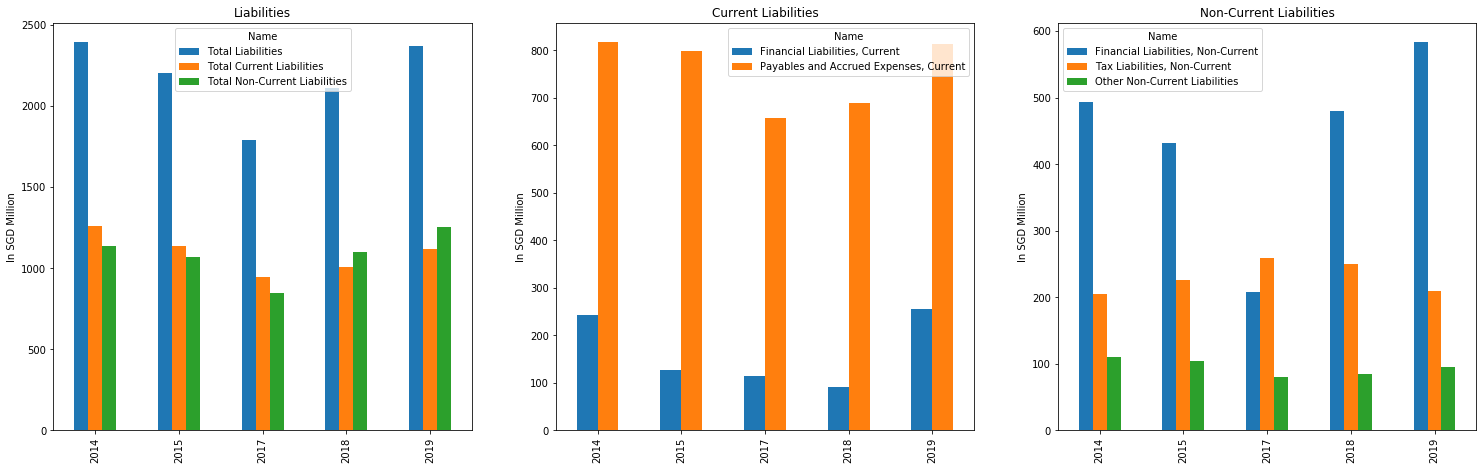

In [7]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(25.5, 7.5)

balance[['Total Liabilities', 'Total Current Liabilities', 'Total Non-Current Liabilities']].plot.bar(ax=axs[0])
axs[0].set_title('Liabilities');
axs[0].set_ylabel("In SGD Million");

balance[['Financial Liabilities, Current', 'Payables and Accrued Expenses, Current']].plot.bar(ax=axs[1])
axs[1].set_title('Current Liabilities');
axs[1].set_ylabel("In SGD Million");

balance[['Financial Liabilities, Non-Current', 'Tax Liabilities, Non-Current', 'Other Non-Current Liabilities']].plot.bar(ax=axs[2])
axs[2].set_title('Non-Current Liabilities');
axs[2].set_ylabel("In SGD Million");

## Shareholders’ Equity


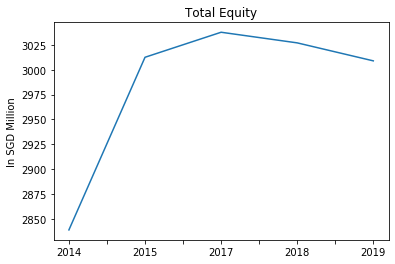

In [8]:
balance['Total Equity'].plot()
plt.title('Total Equity');
plt.ylabel("In SGD Million");

## Liquitity Ratios 

1) Current Ratio
 - *Current Assets* divided by *Current Liabilities*
 - Must be > 1 
 - < 1 means *Current Liabilities* are higher than *Current Assets*
 
2) Quick Ratio (Acid-Test)
 - *Current Assets* minus *Inventories* divided by *Current Liabilities*
 - Exclude *Inventories* as it may take time to sell off thus affect cash flow
 
3) Cash Ratio 
 - *Cash & Cash Equivalents/Marketable securities* divided by *Current Liabilities*
 - Cash is the most liquid assets, *Account Receivables* takes time to get back
 - Strictest out of all, testing the worse case scenario

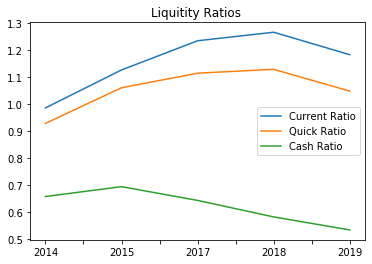

In [9]:
current = balance['Total Current Assets']/balance['Total Current Liabilities']
quick = (balance['Total Current Assets'] - balance['Inventories'])/balance['Total Current Liabilities']
cash = balance['Cash, Cash Equivalents and Short Term Investments']/balance['Total Current Liabilities']

lratios = pd.DataFrame({'Current Ratio': current, 'Quick Ratio': quick, 'Cash Ratio': cash})
lratios.plot()
plt.title('Liquitity Ratios ');